# Heart Disease Analysis

#### Creating script to practice loading, cleaning, and performing simple modeling on a dataset

##### Imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Load data

In [39]:
df = pd.read_csv('heart.csv')

##### Visualize data

In [40]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [41]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [43]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [44]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [45]:
df.loc[(df['sex'] > 0),['thal']].head()

,thal
0,1
1,2
3,2
5,1
7,3


In [46]:
df.query('age > 75')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


In [47]:
df.groupby(['sex','cp'])['age'].mean()

sex  cp
0    0     57.256410
     1     51.944444
     2     54.971429
     3     63.250000
1    0     55.105769
     1     51.031250
     2     52.538462
     3     54.315789
Name: age, dtype: float64

In [48]:
df.pivot_table(index='sex', columns='cp', values='age', aggfunc='mean')

cp,0,1,2,3
sex,,,,
0,57.256410,51.944444,54.971429,63.250000
1,55.105769,51.031250,52.538462,54.315789


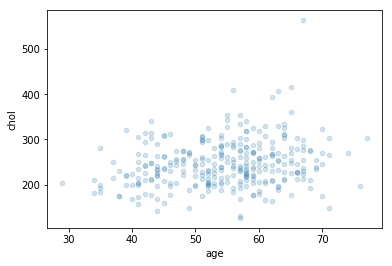

In [49]:
df.plot(kind='scatter', x='age', y='chol', alpha=0.2)

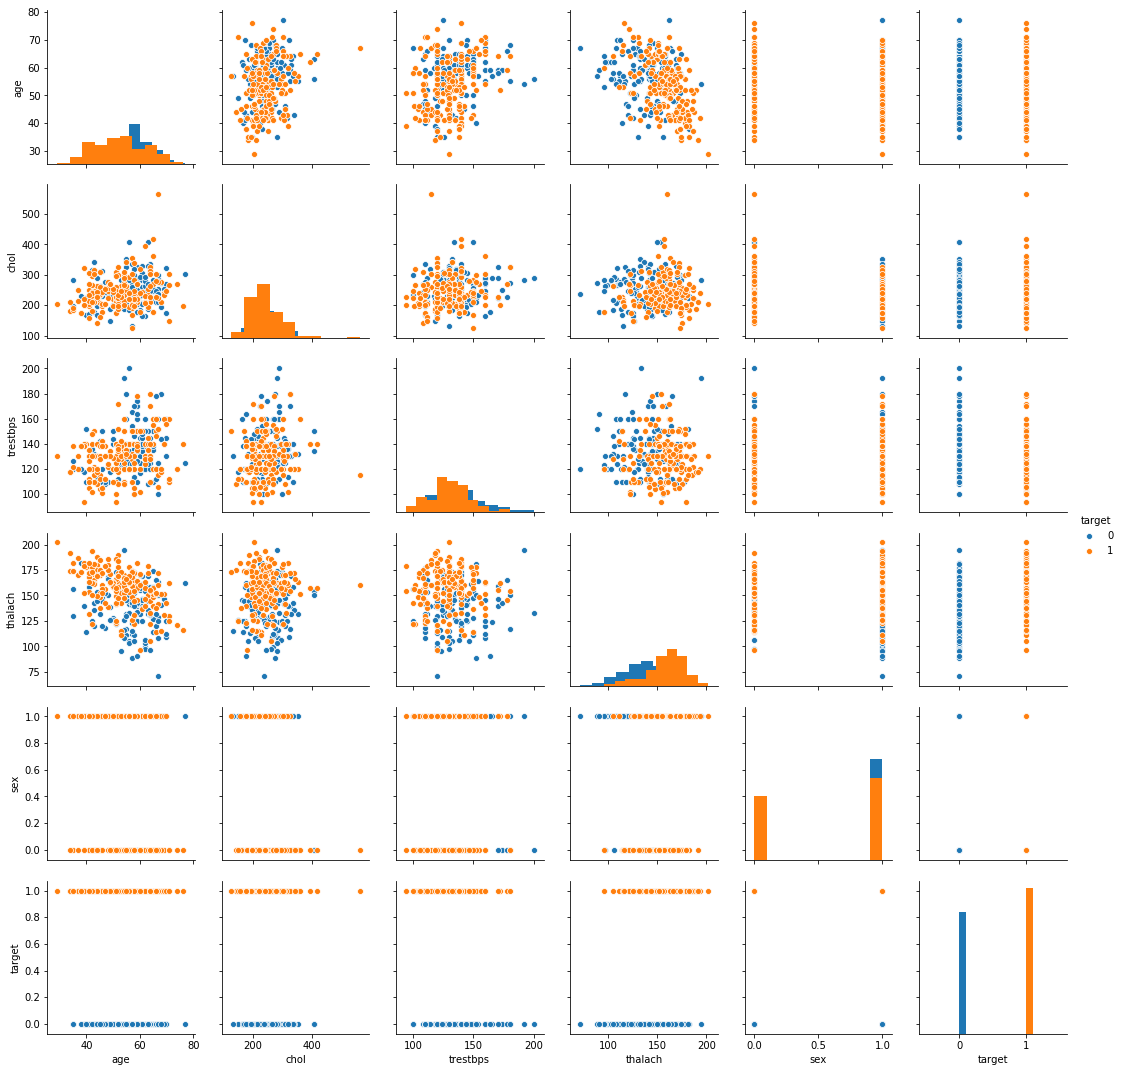

In [50]:
sns.pairplot(df[['age','chol','trestbps','thalach','sex','target']], hue='target', diag_kind='hist')

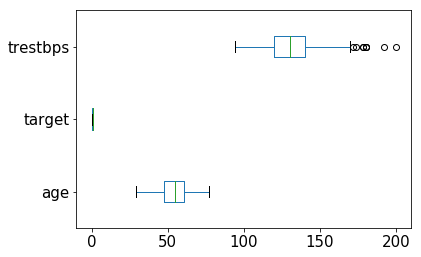

In [51]:
boxplot = df[['age','target','trestbps']].boxplot(grid=False, vert=False,fontsize=15)

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64


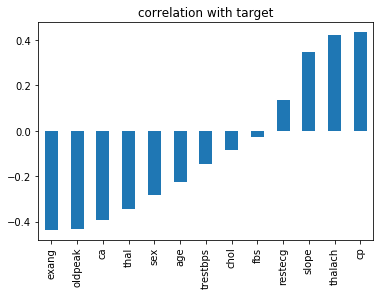

In [52]:
corr_target = df.corr()['target'].sort_values()
print(corr_target)
corr_target.iloc[:-1].plot(kind='bar', title='correlation with target')

##### Look for outliers, missing values, and class distributions

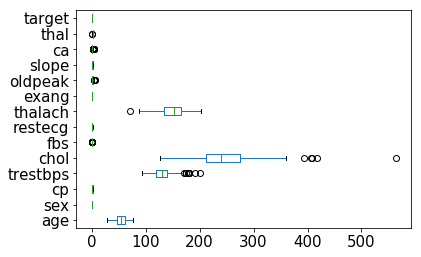

In [53]:
boxplot = df.boxplot(grid=False, vert=False,fontsize=15)

In [54]:
df.isnull().sum() * 100 / len(df)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [55]:
from scipy import stats
z = np.abs(stats.zscore(df))
outliers = (np.where(z > 3))
print("Count Outliers: {}".format(outliers))
outlier_df = df[z > 3]
print(outlier_df)

Count Outliers: (array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281]), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12]))
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
28    65    0   2       140   417    1        0      157      0      0.8   
48    53    0   2       128   216    0        0      115      0      0.0   
85    67    0   2       115   564    0        0      160      0      1.6   
92    52    1   2       138   223    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
163   38    1   2       138   175    0        1      173      0      0.0   
164   38    1   2       138   175    0        1      173      0      0.0   
204   62    0   0       160   164    0        0      145      0      6.2   
220   63    0   0       150   407    0        0      154      0      4.0   
221   55    1   0       140   217    0        1      1

##### Normalize, if needed

Not needed for simple models

##### Feature Engineering and Data Clean Up 

In [56]:
#One hot encode
from sklearn import preprocessing
df = pd.merge(pd.get_dummies(df['sex'],prefix='sex'),df,left_index=True,right_index=True)
df.head()

,sex_0,sex_1,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,0,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,1,0,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,0,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,1,0,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


##### Train/Test Split

In [57]:
X = df.drop('target', axis='columns')
y = df[['target']].values

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size = 0.3, random_state=0)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('age',axis='columns'), df.age,
    test_size = 0.3, random_state=0)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model = LinearRegression()

In [104]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [105]:
y_pred_test = model.predict(X_test)

In [117]:
print('R2: {:0.3f}%'.format(100 * model.score(X_test, y_test)))

R2: 27.042%


In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
mse = mean_squared_error(y_test, y_pred_test)
print('MSE: {:0.3f}'.format(mse))

MSE: 63.185


##### Create Logistic Model

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train, y_train)

/Users/ksinger/AI_projects/heart_disease_proj/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ksinger/AI_projects/heart_disease_proj/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
y_pred_test = model.predict(X_test)

In [63]:
print('Accuracy: {}%'.format(100 * model.score(X_test, y_test).round(5)))

Accuracy: 80.22%


In [64]:
from sklearn.metrics import confusion_matrix, classification_report

In [65]:
cm = confusion_matrix(y_test, y_pred_test)
pd.DataFrame(cm,
             index=["No", "Yes"],
             columns=['pred_No', 'pred_Yes'])

,pred_No,pred_Yes
No,32,12
Yes,6,41


In [66]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

   micro avg       0.80      0.80      0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91



##### Create Tree Model

In [67]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [68]:
y_pred_tree = tree_model.predict(X_test)

In [88]:
print('Accuracy: {}%'.format(100 * tree_model.score(X_test, y_test).round(5)))
tree_model.get_params()

Accuracy: 81.319%


{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

In [70]:
cm = confusion_matrix(y_test, y_pred_tree)
pd.DataFrame(cm,
             index=["No", "Yes"],
             columns=['pred_No', 'pred_Yes'])

,pred_No,pred_Yes
No,32,12
Yes,5,42


In [71]:
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



##### SVM

In [72]:
#Standardize first
scales = ['age','trestbps','chol','thalach']
for col in scales:
    ss = preprocessing.StandardScaler()
    X[col] =  ss.fit_transform(X[[col]])
print(X)

     sex_0  sex_1       age  sex  cp  trestbps      chol  fbs  restecg  \
0        0      1  0.952197    1   3  0.763956 -0.256334    1        0   
1        0      1 -1.915313    1   2 -0.092738  0.072199    0        1   
2        1      0 -1.474158    0   1 -0.092738 -0.816773    0        0   
3        0      1  0.180175    1   1 -0.663867 -0.198357    0        1   
4        1      0  0.290464    0   0 -0.663867  2.082050    0        1   
5        0      1  0.290464    1   0  0.478391 -1.048678    0        1   
6        1      0  0.180175    0   1  0.478391  0.922521    0        0   
7        0      1 -1.143291    1   1 -0.663867  0.323431    0        1   
8        0      1 -0.260980    1   2  2.306004 -0.913400    1        1   
9        0      1  0.290464    1   2  1.049520 -1.512490    0        1   
10       0      1 -0.040403    1   0  0.478391 -0.140381    0        1   
11       1      0 -0.702136    0   2 -0.092738  0.555337    0        1   
12       0      1 -0.591847    1   1 -

/Users/ksinger/AI_projects/heart_disease_proj/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ksinger/AI_projects/heart_disease_proj/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ksinger/AI_projects/heart_disease_proj/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ksinger/AI_projects/heart_disease_proj/venv/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ksing

In [73]:
from sklearn import svm

model_svm = svm.SVC(gamma='scale')
model_svm.fit(X_train, y_train)

/Users/ksinger/AI_projects/heart_disease_proj/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [86]:
y_pred_svm = model_svm.predict(X_test)

In [87]:
print('Accuracy: {}%'.format(100 * model_svm.score(X_test, y_test).round(5)))

Accuracy: 69.231%


In [76]:
cm = confusion_matrix(y_test, y_pred_tree)
pd.DataFrame(cm,
             index=["No", "Yes"],
             columns=['pred_No', 'pred_Yes'])

,pred_No,pred_Yes
No,32,12
Yes,5,42


In [77]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        44
           1       0.69      0.74      0.71        47

   micro avg       0.69      0.69      0.69        91
   macro avg       0.69      0.69      0.69        91
weighted avg       0.69      0.69      0.69        91



##### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

/Users/ksinger/AI_projects/heart_disease_proj/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [99]:
y_pred_rf = model_rf.predict(X_test)

15

In [81]:
from sklearn.metrics import accuracy_score
print('Accuracy: {:0.3f}%'.format(100 * model_rf.score(X_test, y_test)))
accuracy_score(y_test, y_pred_rf)

Accuracy: 81.319%


0.8131868131868132

In [82]:
cm = confusion_matrix(y_test, y_pred_rf)
pd.DataFrame(cm,
             index=["No", "Yes"],
             columns=['pred_No', 'pred_Yes'])

,pred_No,pred_Yes
No,31,13
Yes,4,43


In [83]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.70      0.78        44
           1       0.77      0.91      0.83        47

   micro avg       0.81      0.81      0.81        91
   macro avg       0.83      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

